In [67]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [68]:
players = pd.read_csv('C:/Users/parks/OneDrive/바탕 화면/DATASET/Football/players.csv')
clubs = pd.read_csv('C:/Users/parks/OneDrive/바탕 화면/DATASET/Football/clubs.csv')
valuations = pd.read_csv('C:/Users/parks/OneDrive/바탕 화면/DATASET/Football/player_valuations.csv')
games = pd.read_csv('C:/Users/parks/OneDrive/바탕 화면/DATASET/Football/games.csv')
lineup = pd.read_csv('C:/Users/parks/OneDrive/바탕 화면/DATASET/Football/game_lineups.csv')
club_games = pd.read_csv('C:/Users/parks/OneDrive/바탕 화면/DATASET/Football/club_games.csv')
game_events = pd.read_csv('C:/Users/parks/OneDrive/바탕 화면/DATASET/Football/game_events.csv')
appearances = pd.read_csv('C:/Users/parks/OneDrive/바탕 화면/DATASET/Football/appearances.csv')

In [69]:
# Players 테이블에서 필요없는 칼럼 제거
players = players.drop(['last_season', 'current_club_id', 'image_url', 'url', 'first_name', 'last_name', 'agent_name', 'city_of_birth', 'contract_expiration_date', 'market_value_in_eur'], axis=1)

In [70]:
players.head()

,player_id,name,player_code,country_of_birth,country_of_citizenship,date_of_birth,sub_position,position,foot,height_in_cm,current_club_domestic_competition_id,current_club_name,highest_market_value_in_eur
0,10,Miroslav Klose,miroslav-klose,Poland,Germany,1978-06-09,Centre-Forward,Attack,right,184.0,IT1,Società Sportiva Lazio S.p.A.,30000000.0
1,26,Roman Weidenfeller,roman-weidenfeller,Germany,Germany,1980-08-06,Goalkeeper,Goalkeeper,left,190.0,L1,Borussia Dortmund,8000000.0
2,65,Dimitar Berbatov,dimitar-berbatov,Bulgaria,Bulgaria,1981-01-30,Centre-Forward,Attack,NaN,NaN,GR1,Panthessalonikios Athlitikos Omilos Konstantin...,34500000.0
3,77,Lúcio,lucio,Brazil,Brazil,1978-05-08,Centre-Back,Defender,NaN,NaN,IT1,Juventus Football Club,24500000.0
4,80,Tom Starke,tom-starke,East Germany (GDR),Germany,1981-03-18,Goalkeeper,Goalkeeper,right,194.0,L1,FC Bayern München,3000000.0


In [71]:
# 프리미어리그만 선택
players = players[players['current_club_domestic_competition_id'] == 'GB1']

In [72]:
# Valuations 에서 필요없는 칼럼 제거
valuations = valuations.drop(['player_club_domestic_competition_id'], axis=1)

In [73]:
valuations.head()

,player_id,date,market_value_in_eur,current_club_id
0,405973,2000-01-20,150000,3057
1,342216,2001-07-20,100000,1241
2,3132,2003-12-09,400000,126
3,6893,2003-12-15,900000,984
4,10,2004-10-04,7000000,398


In [74]:
#선수 몸값 변경 날짜 2018 ~ 2024까지
start_date = '2018-08-01'
end_date = '2024-12-31'
mask = (valuations['date'] >= start_date) & (valuations['date'] <= end_date)
valuations = valuations.loc[mask]

In [75]:
valuations = valuations.rename(columns={'date' : 'valuations_date'})

In [76]:
# Players + Valuations 테이블 결합
df_players = pd.merge(players, valuations, on='player_id')

In [77]:
df_players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15067 entries, 0 to 15066
Data columns (total 16 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   player_id                             15067 non-null  int64  
 1   name                                  15067 non-null  object 
 2   player_code                           15067 non-null  object 
 3   country_of_birth                      14613 non-null  object 
 4   country_of_citizenship                14730 non-null  object 
 5   date_of_birth                         15067 non-null  object 
 6   sub_position                          15064 non-null  object 
 7   position                              15067 non-null  object 
 8   foot                                  14799 non-null  object 
 9   height_in_cm                          14912 non-null  float64
 10  current_club_domestic_competition_id  15067 non-null  object 
 11  current_club_na

In [78]:
# 결측치 확인
df_players.isnull().sum()

player_id                                 0
name                                      0
player_code                               0
country_of_birth                        454
country_of_citizenship                  337
date_of_birth                             0
sub_position                              3
position                                  0
foot                                    268
height_in_cm                            155
current_club_domestic_competition_id      0
current_club_name                         0
highest_market_value_in_eur               0
valuations_date                           0
market_value_in_eur                       0
current_club_id                           0
dtype: int64

In [79]:
df_players.head()

,player_id,name,player_code,country_of_birth,country_of_citizenship,date_of_birth,sub_position,position,foot,height_in_cm,current_club_domestic_competition_id,current_club_name,highest_market_value_in_eur,valuations_date,market_value_in_eur,current_club_id
0,2514,Bastian Schweinsteiger,bastian-schweinsteiger,Germany,Germany,1984-08-01,Central Midfield,Midfield,NaN,NaN,GB1,Manchester United Football Club,40000000.0,2018-12-15,2500000,985
1,2514,Bastian Schweinsteiger,bastian-schweinsteiger,Germany,Germany,1984-08-01,Central Midfield,Midfield,NaN,NaN,GB1,Manchester United Football Club,40000000.0,2019-05-27,2500000,985
2,2514,Bastian Schweinsteiger,bastian-schweinsteiger,Germany,Germany,1984-08-01,Central Midfield,Midfield,NaN,NaN,GB1,Manchester United Football Club,40000000.0,2019-11-18,1000000,985
3,2857,Eldin Jakupovic,eldin-jakupovic,Jugoslawien (SFR),Switzerland,1984-10-02,Goalkeeper,Goalkeeper,right,191.0,GB1,Everton Football Club,1500000.0,2018-12-19,1000000,29
4,2857,Eldin Jakupovic,eldin-jakupovic,Jugoslawien (SFR),Switzerland,1984-10-02,Goalkeeper,Goalkeeper,right,191.0,GB1,Everton Football Club,1500000.0,2019-06-13,750000,29


In [80]:
appearances

,appearance_id,game_id,player_id,player_club_id,player_current_club_id,date,player_name,competition_id,yellow_cards,red_cards,goals,assists,minutes_played
0,2231978_38004,2231978,38004,853,235,2012-07-03,Aurélien Joachim,CLQ,0,0,2,0,90
1,2233748_79232,2233748,79232,8841,2698,2012-07-05,Ruslan Abyshov,ELQ,0,0,0,0,90
2,2234413_42792,2234413,42792,6251,465,2012-07-05,Sander Puri,ELQ,0,0,0,0,45
3,2234418_73333,2234418,73333,1274,6646,2012-07-05,Vegar Hedenstad,ELQ,0,0,0,0,90
4,2234421_122011,2234421,122011,195,3008,2012-07-05,Markus Henriksen,ELQ,0,0,0,1,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1556964,4300788_632349,4300788,632349,31,31,2024-03-17,Jarell Quansah,FAC,0,0,0,0,120
1556965,4300788_69633,4300788,69633,985,985,2024-03-17,Christian Eriksen,FAC,0,0,0,0,40
1556966,4300788_712117,4300788,712117,31,31,2024-03-17,Bobby Clark,FAC,0,0,0,0,6
1556967,4300788_811779,4300788,811779,985,985,2024-03-17,Alejandro Garnacho,FAC,0,0,0,1,120


In [81]:
appearances.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556969 entries, 0 to 1556968
Data columns (total 13 columns):
 #   Column                  Non-Null Count    Dtype 
---  ------                  --------------    ----- 
 0   appearance_id           1556969 non-null  object
 1   game_id                 1556969 non-null  int64 
 2   player_id               1556969 non-null  int64 
 3   player_club_id          1556969 non-null  int64 
 4   player_current_club_id  1556969 non-null  int64 
 5   date                    1556969 non-null  object
 6   player_name             1556963 non-null  object
 7   competition_id          1556969 non-null  object
 8   yellow_cards            1556969 non-null  int64 
 9   red_cards               1556969 non-null  int64 
 10  goals                   1556969 non-null  int64 
 11  assists                 1556969 non-null  int64 
 12  minutes_played          1556969 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 154.4+ MB


In [82]:
#Appreances 필요없는 칼럼 삭제
appearances = appearances.drop(['player_current_club_id'], axis=1)

In [83]:
#경기 출전 날짜 2018 ~ 2024까지
start_date = '2018-08-01'
end_date = '2024-12-31'
mask = (appearances['date'] >= start_date) & (appearances['date'] <= end_date)
appearances = appearances.loc[mask]

In [84]:
appearances

,appearance_id,game_id,player_id,player_club_id,date,player_name,competition_id,yellow_cards,red_cards,goals,assists,minutes_played
783491,3052505_212718,3052505,212718,26,2018-08-01,Dimitri Oberlin,CLQ,0,0,0,0,6
783492,3052505_212832,3052505,212832,1091,2018-08-01,Dimitrios Pelkas,CLQ,1,0,0,2,84
783493,3052505_22378,3052505,22378,1091,2018-08-01,Léo Matos,CLQ,1,0,0,0,90
783494,3052505_237641,3052505,237641,1091,2018-08-01,Amr Warda,CLQ,0,0,0,0,6
783495,3052505_324344,3052505,324344,1091,2018-08-01,Dimitrios Limnios,CLQ,0,0,0,0,90
...,...,...,...,...,...,...,...,...,...,...,...,...
1556964,4300788_632349,4300788,632349,31,2024-03-17,Jarell Quansah,FAC,0,0,0,0,120
1556965,4300788_69633,4300788,69633,985,2024-03-17,Christian Eriksen,FAC,0,0,0,0,40
1556966,4300788_712117,4300788,712117,31,2024-03-17,Bobby Clark,FAC,0,0,0,0,6
1556967,4300788_811779,4300788,811779,985,2024-03-17,Alejandro Garnacho,FAC,0,0,0,1,120


In [85]:
appearances = appearances.rename(columns={'date' : 'appearances_date'})

In [86]:
df_players = pd.merge(df_players, appearances, on='player_id')

In [87]:
df_players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1137637 entries, 0 to 1137636
Data columns (total 27 columns):
 #   Column                                Non-Null Count    Dtype  
---  ------                                --------------    -----  
 0   player_id                             1137637 non-null  int64  
 1   name                                  1137637 non-null  object 
 2   player_code                           1137637 non-null  object 
 3   country_of_birth                      1115534 non-null  object 
 4   country_of_citizenship                1115809 non-null  object 
 5   date_of_birth                         1137637 non-null  object 
 6   sub_position                          1137634 non-null  object 
 7   position                              1137637 non-null  object 
 8   foot                                  1135316 non-null  object 
 9   height_in_cm                          1137517 non-null  float64
 10  current_club_domestic_competition_id  1137637 non-null

In [88]:
df_players[['name', 'player_name']]

,name,player_name
0,Jonathan Walters,Jonathan Walters
1,James Milner,James Milner
2,James Milner,James Milner
3,James Milner,James Milner
4,James Milner,James Milner
...,...,...
1137632,Yunus Emre Konak,Yunus Emre Konak
1137633,Yunus Emre Konak,Yunus Emre Konak
1137634,Yunus Emre Konak,Yunus Emre Konak
1137635,Yunus Emre Konak,Yunus Emre Konak


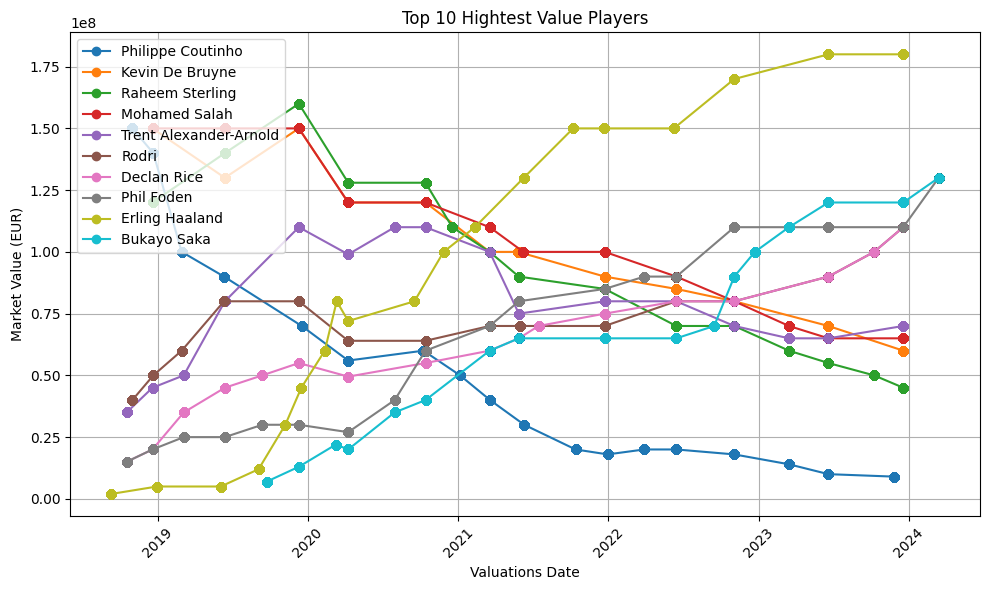

In [115]:
# valuations_date를 날짜 형식으로 변환
df_players['valuations_date'] = pd.to_datetime(df_players['valuations_date'])

# 각 선수의 최고 시장 가치 계산
highest_values = df_players.groupby(['player_id', 'player_name'])['market_value_in_eur'].max().nlargest(10)

# 최고 시장 가치를 기준으로 상위 5명의 선수 데이터 추출
top_players = df_players[df_players['player_id'].isin(highest_values.index.get_level_values(0))]

# 플롯 설정
plt.figure(figsize=(10, 6))

# 각 선수의 데이터를 그래프에 추가
for player_id, player_data in top_players.groupby('player_id'):
    player_name = player_data['player_name'].iloc[0]
    plt.plot(player_data['valuations_date'], player_data['market_value_in_eur'], marker='o', label=player_name)

# 그래프 스타일 및 레이블 설정
plt.xlabel('Valuations Date')
plt.ylabel('Market Value (EUR)')
plt.title('Top 10 Hightest Value Players')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

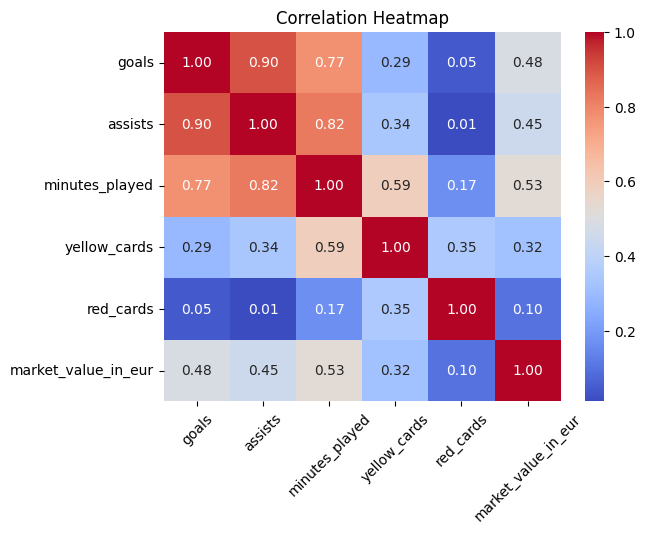

In [121]:
# Goals, Assists, Minutes Played를 따로 구함
df_players['goals'] = df_players.groupby('player_id')['goals'].transform('sum')
df_players['assists'] = df_players.groupby('player_id')['assists'].transform('sum')
df_players['minutes_played'] = df_players.groupby('player_id')['minutes_played'].transform('sum')
df_players['yellow_cards'] = df_players.groupby('player_id')['yellow_cards'].transform('sum')
df_players['red_cards'] = df_players.groupby('player_id')['red_cards'].transform('sum')

# 상관 계수 계산
correlation_matrix = df_players[['goals', 'assists', 'minutes_played', 'yellow_cards', 'red_cards','market_value_in_eur']].corr()

# 히트맵 시각화
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.xticks(rotation=45)
plt.show()